In [1]:
import pandas as pd

Откройте файл Product_Sales.csv и выведите первые 10 строк.
Посмотрите на данные и скажите, что они из себя представляют.
Cколько в таблице строк и полей? Какие типы данных есть в датасете? Есть ли пустые значения?

In [ ]:
# invoice_num: Номер счета
# customer_id: ID клиента
# gender: Пол клиента
# age: Возраст клиента
# category: Категория товара
# quantity: Количество проданных товаров в рамках одного счета
# selling_price_per_unit: Стоимость продажи 1 ед.товара
# cost_price_per_unit: Себестоимость 1 ед.товара
# region: Регион
# state: Штат
# shopping_mall: Магазин

Открываю файл Product_Sales.csv

In [2]:
df = pd.read_csv('Product_Sales.csv')

Вывод первых 10 строк из файла

In [3]:
df.head(10)

,invoice_num,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28.0,Clothing,5,1500.40,1425.38,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21.0,Shoes,3,1800.51,1620.46,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20.0,Clothing,1,300.08,295.06,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66.0,Shoes,5,3000.85,2900.76,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53.0,Books,4,60.60,45.45,South,Florida,Kanyon
5,I227836,10/30/2016 9:59,C657758,Female,28.0,Clothing,5,1500.40,1475.38,West,Oregon,Viaport Outlet
6,I121056,10/30/2016 9:59,C151197,Female,49.0,Cosmetics,1,40.66,35.46,West,California,Istinye Park
7,I293112,10/30/2016 9:59,C176086,Female,32.0,Clothing,2,600.16,450.12,West,California,Mall of Istanbul
8,I293455,10/30/2016 10:00,C159642,Male,69.0,Clothing,3,900.24,675.18,West,California,Metrocity
9,I326945,10/30/2016 10:00,C283361,Female,60.0,Clothing,2,600.16,450.12,West,California,Kanyon


Количество строк и полей в датасете

In [4]:
print('Количество строк: ' + str(df.shape[0]))
print('Количество полей: ' + str(df.shape[1]))

Количество строк: 99949
Количество полей: 12


Типы данных в датасете

In [5]:
df.dtypes

invoice_num                object
invoice_date               object
customer_id                object
gender                     object
age                       float64
category                   object
quantity                    int64
selling_price_per_unit    float64
cost_price_per_unit       float64
region                     object
state                      object
shopping_mall              object
dtype: object

Проверка на пустые значения

In [6]:
df.isna().sum()

invoice_num               0
invoice_date              0
customer_id               0
gender                    6
age                       6
category                  0
quantity                  0
selling_price_per_unit    0
cost_price_per_unit       0
region                    0
state                     0
shopping_mall             0
dtype: int64

6 пустых значений в полях gender и age. Рассмотрим их в таблице

In [7]:
df.loc[df.gender.isnull()]

,invoice_num,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,region,state,shopping_mall
24869,I170688,11/3/2016 10:40,C124074,NaN,NaN,Food & Beverage,3,15.69,10.98,West,California,Istinye Park
24902,I142979,11/3/2016 10:48,C286077,NaN,NaN,Cosmetics,1,40.66,28.46,South,Virginia,Zorlu Center
62093,I321403,11/9/2016 11:26,C957905,NaN,NaN,Souvenir,2,23.46,16.42,West,California,Viaport Outlet
62164,I834335,11/9/2016 11:43,C740421,NaN,NaN,Toys,5,179.20,143.36,Central,Texas,Viaport Outlet
99372,I134370,11/15/2016 12:24,C524812,NaN,NaN,Cosmetics,4,162.64,130.11,West,California,Kanyon
99455,I702964,11/15/2016 12:44,C800631,NaN,NaN,Technology,4,4200.00,3780.00,South,Georgia,Istinye Park


у 6 покупателей  отсутствовали данные о поле и возрасте. Стоит отметить, что было совершено по 2 покупки в три разных дня, причем с равным интервалом в днях (3, 9, 15) в разных магазинах. Временной интервал между покупками в один день составил от 8 до 20 минут. Возможно это связано со сбоями в системе или техническими работами. Либо покупатели не указали свои данные, так как это их первые и единственные покупки. Показано ниже

In [8]:
list_nan = df.loc[df.gender.isnull()].customer_id.tolist()
df.query("customer_id.isin(@list_nan)")

,invoice_num,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,region,state,shopping_mall
24869,I170688,11/3/2016 10:40,C124074,NaN,NaN,Food & Beverage,3,15.69,10.98,West,California,Istinye Park
24902,I142979,11/3/2016 10:48,C286077,NaN,NaN,Cosmetics,1,40.66,28.46,South,Virginia,Zorlu Center
62093,I321403,11/9/2016 11:26,C957905,NaN,NaN,Souvenir,2,23.46,16.42,West,California,Viaport Outlet
62164,I834335,11/9/2016 11:43,C740421,NaN,NaN,Toys,5,179.20,143.36,Central,Texas,Viaport Outlet
99372,I134370,11/15/2016 12:24,C524812,NaN,NaN,Cosmetics,4,162.64,130.11,West,California,Kanyon
99455,I702964,11/15/2016 12:44,C800631,NaN,NaN,Technology,4,4200.00,3780.00,South,Georgia,Istinye Park


Рассмотрим временной интервал, за который приведены данные

In [9]:
df['invoice_date'] = pd.to_datetime(df.invoice_date)
df['invoice_only_date'] = df['invoice_date'].dt.date
df.invoice_only_date.unique()

array([datetime.date(2016, 10, 30), datetime.date(2016, 10, 31),
       datetime.date(2016, 11, 1), datetime.date(2016, 11, 2),
       datetime.date(2016, 11, 3), datetime.date(2016, 11, 4),
       datetime.date(2016, 11, 5), datetime.date(2016, 11, 6),
       datetime.date(2016, 11, 7), datetime.date(2016, 11, 8),
       datetime.date(2016, 11, 9), datetime.date(2016, 11, 10),
       datetime.date(2016, 11, 11), datetime.date(2016, 11, 12),
       datetime.date(2016, 11, 13), datetime.date(2016, 11, 14),
       datetime.date(2016, 11, 15)], dtype=object)

В датасете представлены данные о покупках различных товаров на территории США в период с 30 октября по 15 ноября 2016 года с указанием информации о клиенте, магазине и счете.

In [10]:
print('Количество уникальных номеров счета: ' + str(df.invoice_num.nunique()))
print('Количество строк: ' + str(df.shape[0]))

Количество уникальных номеров счета: 99457
Количество строк: 99949


In [11]:
len(df.invoice_num.value_counts().loc[lambda x : x == 2])

442

In [12]:
len(df.invoice_num.value_counts().loc[lambda x : x == 3])

25

Стоит отметить, что 442 номера счета повторяются дважды в датасете, а 25 трижды. Возможно это дубликаты. Рассмотрим ниже

In [13]:
list_dup_invoice_num = df.invoice_num.value_counts().loc[lambda x : x > 1].index.tolist()
df.query("invoice_num.isin(@list_dup_invoice_num)").sort_values(by = 'invoice_num')

,invoice_num,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,region,state,shopping_mall,invoice_only_date
99940,I100487,2016-10-30 11:45:00,C213360,Female,22.0,Cosmetics,4,162.64,130.11,Central,Illinois,Kanyon,2016-10-30
458,I100487,2016-10-30 11:45:00,C213360,Female,22.0,Cosmetics,4,162.64,130.11,Central,Illinois,Kanyon,2016-10-30
99628,I103596,2016-10-30 10:32:00,C178734,Male,52.0,Shoes,5,3000.85,2700.76,East,Ohio,Kanyon,2016-10-30
146,I103596,2016-10-30 10:32:00,C178734,Male,52.0,Shoes,5,3000.85,2700.76,East,Ohio,Kanyon,2016-10-30
426,I104404,2016-10-30 11:37:00,C111115,Female,21.0,Shoes,3,1800.51,1620.46,Central,Michigan,Kanyon,2016-10-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99802,I995407,2016-10-30 11:12:00,C259743,Female,48.0,Souvenir,3,35.19,24.63,East,New York,Metropol AVM,2016-10-30
445,I995914,2016-10-30 11:42:00,C259260,Male,65.0,Technology,3,3150.00,2677.50,Central,Michigan,Metrocity,2016-10-30
99927,I995914,2016-10-30 11:42:00,C259260,Male,65.0,Technology,3,3150.00,2677.50,Central,Michigan,Metrocity,2016-10-30
99854,I998874,2016-10-30 11:24:00,C321053,Female,19.0,Clothing,5,1500.40,1425.38,West,Arizona,Mall of Istanbul,2016-10-30


 По всем полям видно, что это дубликаты. Причем они записались только 30 октября 2016 года в с 09:58 до 11:46 в разных магазинах. 30 октября 2016 года канун Хэллоуина в США. Ниже приведена градация по категориям покупок среди дубликатов.

In [14]:
df.query("invoice_num.isin(@list_dup_invoice_num)").invoice_date.unique()

<DatetimeArray>
['2016-10-30 09:58:00', '2016-10-30 09:59:00', '2016-10-30 10:00:00',
 '2016-10-30 10:01:00', '2016-10-30 10:02:00', '2016-10-30 10:03:00',
 '2016-10-30 10:04:00', '2016-10-30 10:05:00', '2016-10-30 10:06:00',
 '2016-10-30 10:07:00',
 ...
 '2016-10-30 11:37:00', '2016-10-30 11:38:00', '2016-10-30 11:39:00',
 '2016-10-30 11:40:00', '2016-10-30 11:41:00', '2016-10-30 11:42:00',
 '2016-10-30 11:43:00', '2016-10-30 11:44:00', '2016-10-30 11:45:00',
 '2016-10-30 11:46:00']
Length: 109, dtype: datetime64[ns]

In [15]:
df.query("invoice_num.isin(@list_dup_invoice_num)").category.value_counts()

category
Clothing           310
Food & Beverage    155
Cosmetics          152
Toys                93
Shoes               90
Souvenir            58
Books               54
Technology          47
Name: count, dtype: int64

Удаляем дубликаты и перезаписываем в новый датафрейм re_df

In [16]:
re_df = df.drop_duplicates()
print('Количество строк: ' + str(re_df.shape[0]))
print('Количество полей: ' + str(re_df.shape[1]))

Количество строк: 99457
Количество полей: 13


In [17]:
print('Количество уникальных номеров счета: ' + str(re_df.invoice_num.nunique()))
print('Количество id покупателей: ' + str(re_df.customer_id.nunique()))

Количество уникальных номеров счета: 99457
Количество id покупателей: 99457


Уникальные значения в поле пола

In [18]:
re_df.gender.unique()

array(['Female', 'Male', nan], dtype=object)

Описание поля возраст

In [19]:
re_df.age.describe()

count    99451.000000
mean        43.426904
std         14.990030
min         18.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: age, dtype: float64

Уникальные значения в поле категории товара

In [20]:
re_df.category.unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

Описание поля количество товаров в счете

In [21]:
re_df.quantity.describe()

count    99457.000000
mean         3.004424
std          1.415237
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         15.000000
Name: quantity, dtype: float64

Описание поля цена товара

In [22]:
re_df.selling_price_per_unit.describe()

count    99457.000000
mean       689.256321
std        941.184567
min          5.230000
25%         45.450000
50%        203.300000
75%       1200.320000
max       5250.000000
Name: selling_price_per_unit, dtype: float64

Описание поля себестоимость товара

In [23]:
re_df.cost_price_per_unit.describe()

count    99457.000000
mean       605.113160
std        858.838416
min          3.660000
25%         31.820000
50%        162.640000
75%       1080.310000
max       4725.000000
Name: cost_price_per_unit, dtype: float64

Уникальные значения в поле регион

In [24]:
re_df.region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

Уникальные значения в поле штат

In [25]:
re_df.state.unique()

array(['Kentucky', 'California', 'Florida', 'Oregon', 'Idaho',
       'North Carolina', 'Washington', 'Texas', 'Iowa', 'Pennsylvania',
       'Illinois', 'Michigan', 'Delaware', 'Indiana', 'New York',
       'Arizona', 'Virginia', 'Tennessee', 'Alabama', 'Colorado', 'Ohio',
       'Massachusetts', 'Georgia'], dtype=object)

Количество уникальных штатов в таблице

In [26]:
re_df.state.nunique()

23

Уникальные значения в поле магазин

In [27]:
re_df.shopping_mall.unique()

array(['Kanyon', 'Viaport Outlet', 'Metrocity', 'Metropol AVM',
       'Istinye Park', 'Mall of Istanbul', 'Zorlu Center'], dtype=object)

Выведите список уникальных магазинов

In [28]:
re_df.shopping_mall.unique()

array(['Kanyon', 'Viaport Outlet', 'Metrocity', 'Metropol AVM',
       'Istinye Park', 'Mall of Istanbul', 'Zorlu Center'], dtype=object)

Посчитайте количество проданных товаров в разбивке по категориям. Выведите топ-3 наиболее продаваемых категорий товаров

In [29]:
re_df.groupby(['category'], as_index = False).agg({'quantity' : 'sum'})\
.sort_values(by = 'quantity', ascending = False).head(3)

,category,quantity
1,Clothing,103598
2,Cosmetics,45501
3,Food & Beverage,44281


Посчитайте сумму продаж по штатам. Какой штат продает больше всего, а какой - меньше?

In [30]:
re_df['invoice_sum'] = re_df['quantity'] * re_df['selling_price_per_unit']
re_df.groupby(['state'], as_index = False).agg({'invoice_sum' : 'sum'})\
.sort_values(by = 'invoice_sum', ascending = False)

C:\Users\User\AppData\Local\Temp\ipykernel_33556\2484977371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_df['invoice_sum'] = re_df['quantity'] * re_df['selling_price_per_unit']


,state,invoice_sum
2,California,48014602.55
14,New York,29344728.10
20,Texas,24842174.55
18,Pennsylvania,15021619.37
8,Illinois,12674594.05
22,Washington,12626612.80
16,Ohio,11457411.61
10,Iowa,11392717.41
4,Delaware,9484681.48
5,Florida,9441507.77


- Сумма продаж выше всего у Калифорнии, ниже всего - у Индианы

Разбейте покупателей на возрастные группы. Группы определите самостоятельно. Какая из этих групп тратит больше всего денег на одежду?

In [31]:
re_df.age.describe()

count    99451.000000
mean        43.426904
std         14.990030
min         18.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: age, dtype: float64

In [32]:
re_df.age.nunique()

52

Ниже построена столбчатая диаграмма распределения суммы всех покупок по возрастам и выведены топ-5 возрастов по наибольшим тратам

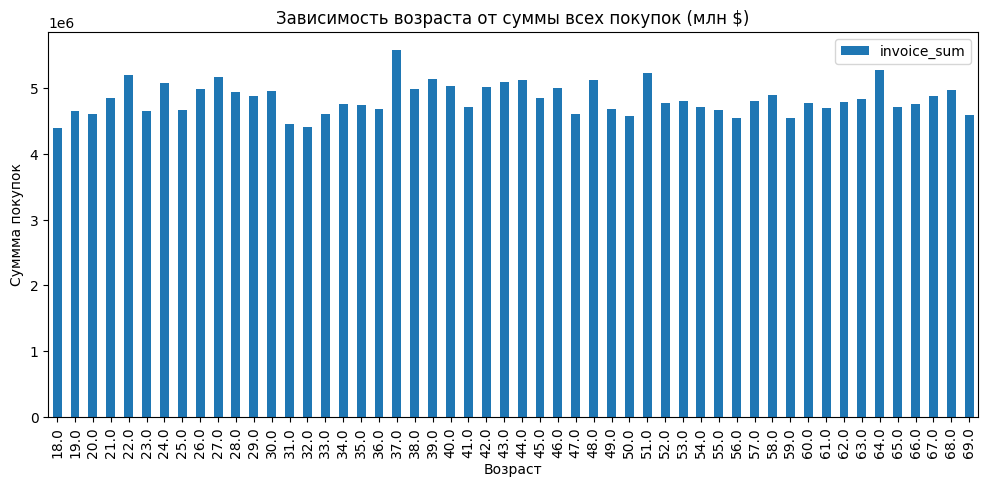

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

re_df.groupby(['age'], as_index = False).agg({'invoice_sum' : 'sum'})\
.plot(x='age', kind='bar', figsize=(12, 5))

plt.title('Зависимость возраста от суммы всех покупок (млн $)')
plt.xlabel('Возраст')
plt.ylabel('Суммма покупок')
plt.show()

In [34]:
re_df.groupby(['age'], as_index = False).agg({'invoice_sum' : 'sum'})\
.sort_values(by = 'invoice_sum', ascending = False).head(5)

,age,invoice_sum
19,37.0,5579271.45
46,64.0,5272475.10
33,51.0,5238724.74
4,22.0,5208190.85
9,27.0,5174859.86


Ниже построена столбчатая диаграмма распределения суммы всех покупок одежды по возрастам и выведены топ-5 возрастов по наибольшим тратам

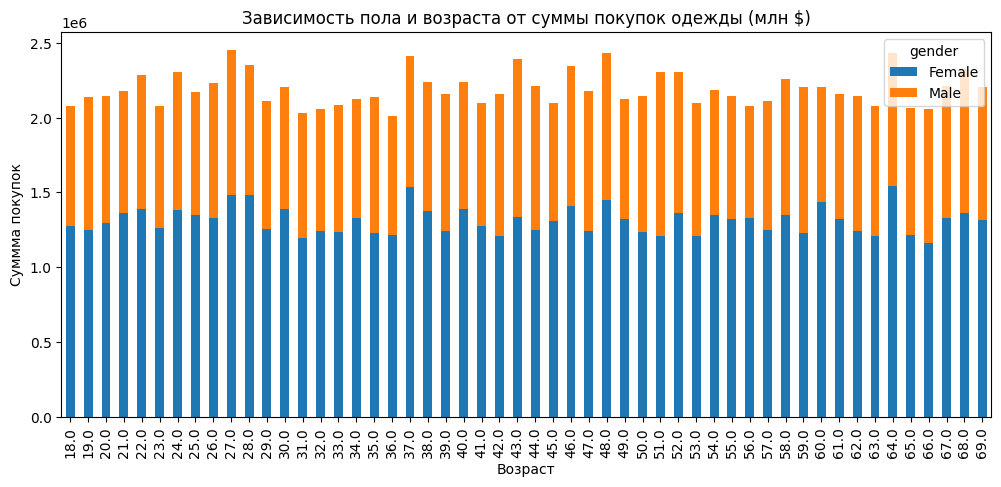

In [35]:
pivot_table = pd.pivot_table(
    re_df.query("category == 'Clothing'").groupby(['age', 'gender'], as_index = False)\
    .agg({'invoice_sum' : 'sum'}),\
    values='invoice_sum', index='age',\
    columns='gender',\
    aggfunc='sum')


pivot_table.plot(kind='bar', stacked=True, figsize=(12, 5))
plt.title('Зависимость пола и возраста от суммы покупок одежды (млн $)')
plt.xlabel('Возраст')
plt.ylabel('Суммма покупок')
plt.show()

In [36]:
re_df.query("category == 'Clothing'").groupby(['age'], as_index = False).agg({'invoice_sum' : 'sum'})\
.sort_values(by = 'invoice_sum', ascending = False).head(5)

,age,invoice_sum
9,27.0,2451353.52
46,64.0,2433648.80
30,48.0,2433048.64
19,37.0,2413543.44
25,43.0,2392237.76


Возьмем топ-4 возраста по сумме трат на покупки. Получим 4 возрастных сегмента:
- 18-27 лет
- 28-37 лет
- 38-48 лет
- 49-69 лет

In [37]:
re_df['age_group_1'] = re_df['age'].apply(lambda x: '18-27 y.o' if x<= 27 \
                                        else '28-37 y.o' if x>27 and x<=37 \
                                        else '38-48 y.o' if x>37 and x<=48 \
                                        else '49-69 y.o' if x>48 \
                                       else None)

C:\Users\User\AppData\Local\Temp\ipykernel_33556\3479237917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_df['age_group_1'] = re_df['age'].apply(lambda x: '18-27 y.o' if x<= 27 \


In [38]:
re_df.age_group_1.isna().sum()

6

In [39]:
age_gr1 = re_df.query("category == 'Clothing'").groupby(['age_group_1'], as_index = False)\
.agg({'invoice_sum' : 'sum'})\
.sort_values(by = 'invoice_sum', ascending = False)

age_gr1['percent'] = round(age_gr1.invoice_sum / age_gr1.invoice_sum.sum() *100, 2)
age_gr1

,age_group_1,invoice_sum,percent
3,49-69 y.o,45863927.12,40.23
2,38-48 y.o,24547444.24,21.53
0,18-27 y.o,22065182.48,19.35
1,28-37 y.o,21537941.92,18.89


Получилось так, что группа покупателей в возрасте от 49 до 69 лет забрала на себя большую часть рынка (40.23 % от общих трат на одежду)

Попробуем еще поделить равноверно на 4 сегмента по 13 возрастов:
- 18-30 молодежь
- 31-43 взрослые люди
- 44-56 предпенсионный возраст
- 57-69 пожилые люди

In [40]:
re_df['age_group_2'] = re_df['age'].apply(lambda x: '18-30 y.o' if x<= 30 \
                                        else '31-43 y.o' if x>30 and x<=43 \
                                        else '44-56 y.o' if x>43 and x<=56 \
                                        else '57-69 y.o' if x>56 \
                                       else None)

C:\Users\User\AppData\Local\Temp\ipykernel_33556\1054196087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_df['age_group_2'] = re_df['age'].apply(lambda x: '18-30 y.o' if x<= 30 \


In [41]:
age_gr2 = re_df.query("category == 'Clothing'").groupby(['age_group_2'], as_index = False)\
.agg({'invoice_sum' : 'sum'})\
.sort_values(by = 'invoice_sum', ascending = False)

age_gr2['percent'] = round(age_gr2.invoice_sum / age_gr2.invoice_sum.sum() *100, 2)
age_gr2

,age_group_2,invoice_sum,percent
0,18-30 y.o,28728758.96,25.20
2,44-56 y.o,28659140.40,25.14
3,57-69 y.o,28469489.84,24.97
1,31-43 y.o,28157106.56,24.70


Получилось так, что группа покупателей в возрасте от 18 до 30 лет стала лидером рынка (25.2 % от общих трат на одежду). Стоит отметить, что деление получилось равномерным - по четверти каждому. Для верного разделения стоит рассматривать задачу подробнее и учитывать влияющие факторы. В данном случае представлено 2 варианта разделения.

Какая доля всех покупок оплачивалась наличными? Используйте файл Product_Payment.csv, чтобы подтянуть метод оплаты

In [42]:
pr_pay = pd.read_csv('Product_Payment.csv')

общая информация о датасете

In [43]:
print('Количество строк: ' + str(pr_pay.shape[0]))
print('Количество полей: ' + str(pr_pay.shape[1]))

Количество строк: 99457
Количество полей: 2


In [44]:
pr_pay.dtypes

invoice_num       object
payment_method    object
dtype: object

In [45]:
pr_pay.invoice_num.nunique()

99457

In [46]:
pr_pay.payment_method.unique()

array(['Credit Card', 'Debit Card', 'Cash'], dtype=object)

In [47]:
all_df = pd.merge(re_df,
                 pr_pay,
                 on = 'invoice_num',
                 how = 'left')

part_cash_invoices_sum = all_df.query("payment_method == 'Cash'").invoice_sum.sum()/all_df.invoice_sum.sum()
part_cash_invoices = all_df.query("payment_method == 'Cash'").shape[0]/all_df.shape[0]

print("Доля чеков, оплаченных наличными, от общего кол-ва чеков: " + str(round(part_cash_invoices*100, 2)) + ' %')
print("Доля суммы чеков, оплаченных наличными, от общей суммы чеков: " + str(round(part_cash_invoices_sum*100, 2)) + ' %')

Доля чеков, оплаченных наличными, от общего кол-ва чеков: 44.69 %
Доля суммы чеков, оплаченных наличными, от общей суммы чеков: 44.86 %
